In [1]:
import keras
import numpy as np
import pandas as pd
from PIL import Image as img

C:\Users\Pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
keras.backend.image_data_format()

'channels_last'

In [4]:
keras.backend.set_image_data_format('channels_first')
keras.backend.image_data_format()

'channels_first'

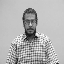

In [5]:
img.open(r'..\cnn\CNN_Cinsiyet\veriler\training_set\erkek\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o.jpg').resize((64,64)).convert('L')

In [6]:
#img.open(r'..\cnn\CNN_Cinsiyet\veriler\training_set\AlyM_00521_f_18_o_nf_cr_no_2015_1_e0_nl_o.jpg').resize((64,64)).convert('L')

### Data Load(for trainig)

In [7]:
male_train_list = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\training_set\erkek\*.jpg")
female_train_list = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\training_set\kadin\*.jpg")

In [8]:
#male_train_list

In [9]:
x_train = []

for i in tqdm(female_train_list):
    temp = img.open(i).resize((64,64)).convert('L')
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
        
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    
y_train = np.tile(1 , len(female_train_list)*4)

    
print('done')

100%|██████████| 1030/1030 [00:20<00:00, 49.31it/s]


done


In [10]:
for i in tqdm(male_train_list):
    temp = img.open(i).resize((64,64)).convert('L')
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
        
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    
y_train = np.concatenate((y_train, np.tile(0, len(male_train_list)*4))).astype("uint8")
    
print('done')

100%|██████████| 1632/1632 [00:35<00:00, 46.44it/s]


done


In [11]:
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [12]:
a = np.asarray(x_train)
x_train = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [13]:
x_train.shape

(10648, 1, 64, 64)

In [14]:
y_train.shape

(10648,)

In [15]:
del(a)


In [16]:
LeakyReLU = keras.layers.LeakyReLU(alpha=0.01)

In [44]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(1, 64, 64)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=64, activation="relu", kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=12, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [45]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.binary_crossentropy,
              metrics=["binary_accuracy"])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 63, 63)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 61, 61)        9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 61, 61)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 59, 59)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 19, 19)        0         
__________

### Model Tranining

In [64]:
model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.1, shuffle=True)

Train on 9583 samples, validate on 1065 samples
Epoch 1/5


4992/9583 [==============>...............] - ETA: 17:21 - loss: 0.7031 - binary_accuracy: 0.53 - ETA: 17:26 - loss: 0.6762 - binary_accuracy: 0.60 - ETA: 17:27 - loss: 0.6831 - binary_accuracy: 0.58 - ETA: 17:53 - loss: 0.6954 - binary_accuracy: 0.55 - ETA: 17:45 - loss: 0.6918 - binary_accuracy: 0.55 - ETA: 17:38 - loss: 0.6908 - binary_accuracy: 0.55 - ETA: 17:51 - loss: 0.6869 - binary_accuracy: 0.56 - ETA: 18:06 - loss: 0.6882 - binary_accuracy: 0.55 - ETA: 17:56 - loss: 0.6904 - binary_accuracy: 0.54 - ETA: 17:48 - loss: 0.6869 - binary_accuracy: 0.55 - ETA: 17:40 - loss: 0.6880 - binary_accuracy: 0.54 - ETA: 17:40 - loss: 0.6870 - binary_accuracy: 0.54 - ETA: 17:35 - loss: 0.6835 - binary_accuracy: 0.55 - ETA: 17:28 - loss: 0.6820 - binary_accuracy: 0.56 - ETA: 17:22 - loss: 0.6819 - binary_accuracy: 0.56 - ETA: 17:16 - loss: 0.6782 - binary_accuracy: 0.56 - ETA: 17:15 - loss: 0.6748 - binary_accuracy: 0.57 - ETA: 16:52 - loss: 0.6753 - binary_accuracy: 0.57 - ETA: 16:27 - loss: 

5024/9583 [==============>...............] - ETA: 17:33 - loss: 0.4897 - binary_accuracy: 0.71 - ETA: 18:29 - loss: 0.5481 - binary_accuracy: 0.71 - ETA: 18:08 - loss: 0.4925 - binary_accuracy: 0.76 - ETA: 17:56 - loss: 0.4808 - binary_accuracy: 0.78 - ETA: 17:47 - loss: 0.5156 - binary_accuracy: 0.75 - ETA: 17:48 - loss: 0.5520 - binary_accuracy: 0.73 - ETA: 17:51 - loss: 0.5435 - binary_accuracy: 0.74 - ETA: 17:42 - loss: 0.5461 - binary_accuracy: 0.74 - ETA: 17:35 - loss: 0.5390 - binary_accuracy: 0.75 - ETA: 17:28 - loss: 0.5292 - binary_accuracy: 0.75 - ETA: 17:33 - loss: 0.5278 - binary_accuracy: 0.75 - ETA: 17:27 - loss: 0.5207 - binary_accuracy: 0.76 - ETA: 17:22 - loss: 0.5165 - binary_accuracy: 0.75 - ETA: 17:23 - loss: 0.5114 - binary_accuracy: 0.75 - ETA: 17:30 - loss: 0.5128 - binary_accuracy: 0.75 - ETA: 17:23 - loss: 0.5052 - binary_accuracy: 0.75 - ETA: 17:17 - loss: 0.5041 - binary_accuracy: 0.75 - ETA: 17:11 - loss: 0.4978 - binary_accuracy: 0.76 - ETA: 17:08 - loss: 

9583/9583 [==============================] - ETA: 6:07 - loss: 0.4397 - binary_accuracy: 0.797 - ETA: 6:04 - loss: 0.4397 - binary_accuracy: 0.797 - ETA: 6:01 - loss: 0.4396 - binary_accuracy: 0.797 - ETA: 5:58 - loss: 0.4394 - binary_accuracy: 0.797 - ETA: 5:55 - loss: 0.4390 - binary_accuracy: 0.798 - ETA: 5:52 - loss: 0.4391 - binary_accuracy: 0.797 - ETA: 5:49 - loss: 0.4393 - binary_accuracy: 0.797 - ETA: 5:46 - loss: 0.4389 - binary_accuracy: 0.797 - ETA: 5:44 - loss: 0.4385 - binary_accuracy: 0.797 - ETA: 5:41 - loss: 0.4378 - binary_accuracy: 0.798 - ETA: 5:38 - loss: 0.4373 - binary_accuracy: 0.798 - ETA: 5:35 - loss: 0.4373 - binary_accuracy: 0.798 - ETA: 5:32 - loss: 0.4367 - binary_accuracy: 0.798 - ETA: 5:29 - loss: 0.4360 - binary_accuracy: 0.798 - ETA: 5:26 - loss: 0.4352 - binary_accuracy: 0.798 - ETA: 5:23 - loss: 0.4351 - binary_accuracy: 0.798 - ETA: 5:20 - loss: 0.4347 - binary_accuracy: 0.798 - ETA: 5:18 - loss: 0.4338 - binary_accuracy: 0.799 - ETA: 5:15 - loss: 0

5024/9583 [==============>...............] - ETA: 9:20 - loss: 0.3593 - binary_accuracy: 0.781 - ETA: 9:18 - loss: 0.4313 - binary_accuracy: 0.781 - ETA: 9:18 - loss: 0.3906 - binary_accuracy: 0.812 - ETA: 9:16 - loss: 0.3734 - binary_accuracy: 0.812 - ETA: 9:18 - loss: 0.3481 - binary_accuracy: 0.831 - ETA: 9:25 - loss: 0.3639 - binary_accuracy: 0.817 - ETA: 9:20 - loss: 0.3635 - binary_accuracy: 0.817 - ETA: 9:18 - loss: 0.3385 - binary_accuracy: 0.835 - ETA: 9:16 - loss: 0.3292 - binary_accuracy: 0.840 - ETA: 9:13 - loss: 0.3208 - binary_accuracy: 0.843 - ETA: 9:11 - loss: 0.3222 - binary_accuracy: 0.846 - ETA: 9:08 - loss: 0.3075 - binary_accuracy: 0.854 - ETA: 9:06 - loss: 0.3349 - binary_accuracy: 0.848 - ETA: 9:08 - loss: 0.3415 - binary_accuracy: 0.841 - ETA: 9:05 - loss: 0.3330 - binary_accuracy: 0.850 - ETA: 9:03 - loss: 0.3375 - binary_accuracy: 0.845 - ETA: 9:00 - loss: 0.3336 - binary_accuracy: 0.849 - ETA: 8:58 - loss: 0.3264 - binary_accuracy: 0.855 - ETA: 8:55 - loss: 0

5024/9583 [==============>...............] - ETA: 9:54 - loss: 0.2729 - binary_accuracy: 0.781 - ETA: 9:38 - loss: 0.3168 - binary_accuracy: 0.781 - ETA: 9:35 - loss: 0.2753 - binary_accuracy: 0.812 - ETA: 9:33 - loss: 0.3586 - binary_accuracy: 0.796 - ETA: 9:30 - loss: 0.3321 - binary_accuracy: 0.825 - ETA: 9:26 - loss: 0.3239 - binary_accuracy: 0.833 - ETA: 9:25 - loss: 0.3118 - binary_accuracy: 0.843 - ETA: 9:28 - loss: 0.3202 - binary_accuracy: 0.839 - ETA: 9:37 - loss: 0.3145 - binary_accuracy: 0.836 - ETA: 9:38 - loss: 0.3069 - binary_accuracy: 0.840 - ETA: 9:35 - loss: 0.3024 - binary_accuracy: 0.838 - ETA: 9:31 - loss: 0.3038 - binary_accuracy: 0.835 - ETA: 9:27 - loss: 0.2938 - binary_accuracy: 0.843 - ETA: 9:24 - loss: 0.2888 - binary_accuracy: 0.848 - ETA: 9:20 - loss: 0.3026 - binary_accuracy: 0.843 - ETA: 9:18 - loss: 0.2934 - binary_accuracy: 0.851 - ETA: 9:17 - loss: 0.2849 - binary_accuracy: 0.856 - ETA: 9:14 - loss: 0.2780 - binary_accuracy: 0.861 - ETA: 9:12 - loss: 0

9583/9583 [==============================] - ETA: 4:48 - loss: 0.2727 - binary_accuracy: 0.869 - ETA: 4:47 - loss: 0.2723 - binary_accuracy: 0.869 - ETA: 4:46 - loss: 0.2722 - binary_accuracy: 0.869 - ETA: 4:45 - loss: 0.2715 - binary_accuracy: 0.869 - ETA: 4:45 - loss: 0.2718 - binary_accuracy: 0.869 - ETA: 4:44 - loss: 0.2724 - binary_accuracy: 0.868 - ETA: 4:43 - loss: 0.2732 - binary_accuracy: 0.868 - ETA: 4:42 - loss: 0.2728 - binary_accuracy: 0.869 - ETA: 4:42 - loss: 0.2718 - binary_accuracy: 0.869 - ETA: 4:41 - loss: 0.2724 - binary_accuracy: 0.869 - ETA: 4:40 - loss: 0.2733 - binary_accuracy: 0.869 - ETA: 4:39 - loss: 0.2731 - binary_accuracy: 0.869 - ETA: 4:38 - loss: 0.2736 - binary_accuracy: 0.869 - ETA: 4:37 - loss: 0.2736 - binary_accuracy: 0.869 - ETA: 4:36 - loss: 0.2731 - binary_accuracy: 0.869 - ETA: 4:35 - loss: 0.2736 - binary_accuracy: 0.869 - ETA: 4:34 - loss: 0.2741 - binary_accuracy: 0.869 - ETA: 4:33 - loss: 0.2740 - binary_accuracy: 0.869 - ETA: 4:31 - loss: 0

5024/9583 [==============>...............] - ETA: 16:57 - loss: 0.1274 - binary_accuracy: 1.00 - ETA: 17:00 - loss: 0.2184 - binary_accuracy: 0.90 - ETA: 17:07 - loss: 0.1870 - binary_accuracy: 0.92 - ETA: 17:37 - loss: 0.2804 - binary_accuracy: 0.89 - ETA: 17:32 - loss: 0.2501 - binary_accuracy: 0.91 - ETA: 17:27 - loss: 0.2688 - binary_accuracy: 0.89 - ETA: 17:21 - loss: 0.2647 - binary_accuracy: 0.89 - ETA: 17:26 - loss: 0.2530 - binary_accuracy: 0.89 - ETA: 17:24 - loss: 0.2430 - binary_accuracy: 0.89 - ETA: 17:17 - loss: 0.2367 - binary_accuracy: 0.90 - ETA: 17:20 - loss: 0.2391 - binary_accuracy: 0.89 - ETA: 17:30 - loss: 0.2436 - binary_accuracy: 0.89 - ETA: 17:29 - loss: 0.2469 - binary_accuracy: 0.88 - ETA: 17:23 - loss: 0.2524 - binary_accuracy: 0.88 - ETA: 17:17 - loss: 0.2535 - binary_accuracy: 0.87 - ETA: 17:11 - loss: 0.2562 - binary_accuracy: 0.87 - ETA: 17:12 - loss: 0.2539 - binary_accuracy: 0.87 - ETA: 17:07 - loss: 0.2463 - binary_accuracy: 0.88 - ETA: 17:02 - loss: 

In [47]:
model.save("model_01.h5")

In [ ]:
np.arange(1, len(model.history.history["binary_accuracy"])+1, 1)

AttributeError: 'Sequential' object has no attribute 'history'

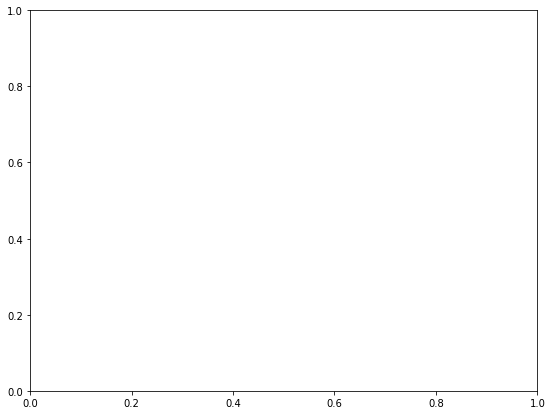

In [49]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(model.history.history["binary_accuracy"])
plt.plot(model.history.history["val_binary_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
#plt.xticks(np.arange(0, len(model.history.history["binary_accuracy"]), 1))

plt.xticks(np.arange(len(model.history.history["binary_accuracy"])), np.arange(1, len(model.history.history["binary_accuracy"])+1, 1))

plt.subplot(1, 2, 2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.xticks(np.arange(len(model.history.history["loss"])), np.arange(1, len(model.history.history["loss"])+1, 1))
plt.show()

extra

In [50]:
model = keras.models.load_model("model_01.h5")

In [23]:
model.fit(x=x_train, y=y_train, epochs=1, validation_split=0.1, shuffle=True)

Train on 9583 samples, validate on 1065 samples
Epoch 1/1


4992/9583 [==============>...............] - ETA: 14:46 - loss: 0.6809 - binary_accuracy: 0.65 - ETA: 13:17 - loss: 0.6427 - binary_accuracy: 0.68 - ETA: 12:38 - loss: 0.6452 - binary_accuracy: 0.67 - ETA: 12:00 - loss: 0.6580 - binary_accuracy: 0.65 - ETA: 11:27 - loss: 0.6616 - binary_accuracy: 0.64 - ETA: 11:04 - loss: 0.6626 - binary_accuracy: 0.64 - ETA: 10:48 - loss: 0.6580 - binary_accuracy: 0.64 - ETA: 10:35 - loss: 0.6658 - binary_accuracy: 0.62 - ETA: 10:25 - loss: 0.6698 - binary_accuracy: 0.61 - ETA: 10:23 - loss: 0.6692 - binary_accuracy: 0.60 - ETA: 10:15 - loss: 0.6706 - binary_accuracy: 0.60 - ETA: 10:07 - loss: 0.6710 - binary_accuracy: 0.60 - ETA: 10:01 - loss: 0.6700 - binary_accuracy: 0.60 - ETA: 9:56 - loss: 0.6698 - binary_accuracy: 0.5982 - ETA: 9:51 - loss: 0.6680 - binary_accuracy: 0.602 - ETA: 9:46 - loss: 0.6692 - binary_accuracy: 0.599 - ETA: 9:41 - loss: 0.6705 - binary_accuracy: 0.597 - ETA: 9:41 - loss: 0.6714 - binary_accuracy: 0.592 - ETA: 9:37 - loss: 

9583/9583 [==============================] - ETA: 4:47 - loss: 0.6100 - binary_accuracy: 0.643 - ETA: 4:45 - loss: 0.6093 - binary_accuracy: 0.644 - ETA: 4:43 - loss: 0.6089 - binary_accuracy: 0.643 - ETA: 4:41 - loss: 0.6081 - binary_accuracy: 0.644 - ETA: 4:39 - loss: 0.6072 - binary_accuracy: 0.645 - ETA: 4:37 - loss: 0.6071 - binary_accuracy: 0.645 - ETA: 4:35 - loss: 0.6061 - binary_accuracy: 0.646 - ETA: 4:33 - loss: 0.6072 - binary_accuracy: 0.645 - ETA: 4:31 - loss: 0.6068 - binary_accuracy: 0.645 - ETA: 4:29 - loss: 0.6062 - binary_accuracy: 0.645 - ETA: 4:27 - loss: 0.6055 - binary_accuracy: 0.646 - ETA: 4:25 - loss: 0.6044 - binary_accuracy: 0.646 - ETA: 4:23 - loss: 0.6031 - binary_accuracy: 0.647 - ETA: 4:21 - loss: 0.6021 - binary_accuracy: 0.648 - ETA: 4:19 - loss: 0.6014 - binary_accuracy: 0.648 - ETA: 4:16 - loss: 0.6007 - binary_accuracy: 0.649 - ETA: 4:14 - loss: 0.5997 - binary_accuracy: 0.650 - ETA: 4:12 - loss: 0.5994 - binary_accuracy: 0.650 - ETA: 4:10 - loss: 0

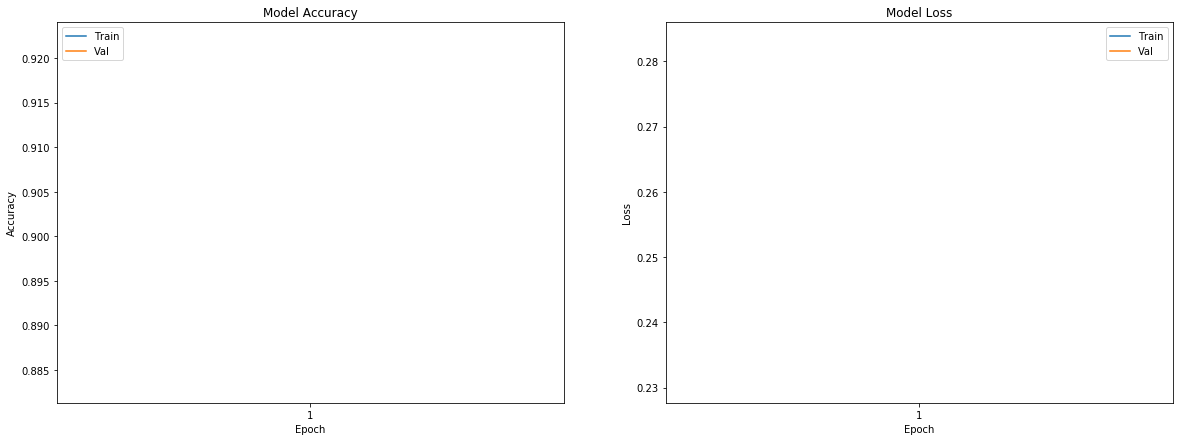

### Data Load(train set)

In [24]:
test_list1 = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\test_set\erkek\*.jpg")
test_list2 = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\test_set\kadin\*.jpg")
test_list = test_list1 + test_list2

In [25]:
x_test = []

for i in tqdm(test_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    x_test.append((np.array(temp) - np.mean(temp)) / np.std(temp))#scaling

print("test images loading is done")

100%|██████████| 203/203 [00:04<00:00, 41.12it/s]


test images loading is done


In [26]:
x_test

[array([[0.04898993, 0.14261539, 0.18942812, ..., 0.56392994, 0.54052358,
         0.44689812],
        [0.0723963 , 0.14261539, 0.16602175, ..., 0.56392994, 0.56392994,
         0.49371085],
        [0.09580266, 0.16602175, 0.16602175, ..., 0.54052358, 0.51711721,
         0.49371085],
        ...,
        [0.11920902, 0.16602175, 0.16602175, ..., 0.30645994, 0.28305357,
         0.25964721],
        [0.04898993, 0.11920902, 0.16602175, ..., 0.25964721, 0.25964721,
         0.18942812],
        [0.0021772 , 0.04898993, 0.14261539, ..., 0.25964721, 0.21283448,
         0.14261539]]),
 array([[ 0.03084972,  0.10170607,  0.17256241, ...,  0.55046289,
          0.50322533,  0.40875021],
        [ 0.07808728,  0.14894363,  0.14894363, ...,  0.55046289,
          0.50322533,  0.45598777],
        [ 0.10170607,  0.10170607,  0.17256241, ...,  0.55046289,
          0.50322533,  0.47960655],
        ...,
        [ 0.10170607,  0.17256241,  0.17256241, ...,  0.26703753,
          0.24341875,  0

In [27]:
a = np.asarray(x_test)
x_test = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [28]:
del(a)

## Predict

In [29]:
result = model.predict(x=x_test)

In [38]:
idx = []
for i in test_list:
    idx.append(i[35:-4])

In [39]:
idx

['t\\erkek\\AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00006_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00007_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00008_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00009_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00010_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00011_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00012_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00013_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00014_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00015_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00016_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00017_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00018_m_31_i_fr_nc_no_2016_2_e0

In [40]:
result = result.reshape(result.shape[0])
result[result>0.5] = 1
result[result<0.5] = 0

In [41]:
submission = {"id": idx, "label": result}

In [42]:
pd.DataFrame(submission).to_csv("submission.csv", index=False)

In [43]:
pd.DataFrame(submission)

,id,label
0,t\erkek\AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o,0.0
1,t\erkek\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o,0.0
2,t\erkek\AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
3,t\erkek\AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
4,t\erkek\AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
5,t\erkek\AbdA_00006_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
6,t\erkek\AbdA_00007_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
7,t\erkek\AbdA_00008_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
8,t\erkek\AbdA_00009_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
9,t\erkek\AbdA_00010_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
